In [72]:
import torch
import numpy as np
import torch.nn as nn
import os
import pickle
import matplotlib.pyplot as plt
import torchvision.utils as vutils
torch.manual_seed(1)

In [54]:
os.listdir('logs')

['2020-04-23--21-27-29_log',
 '2020-04-28--19-56-43_log',
 '2020-04-28--19-57-09_log']

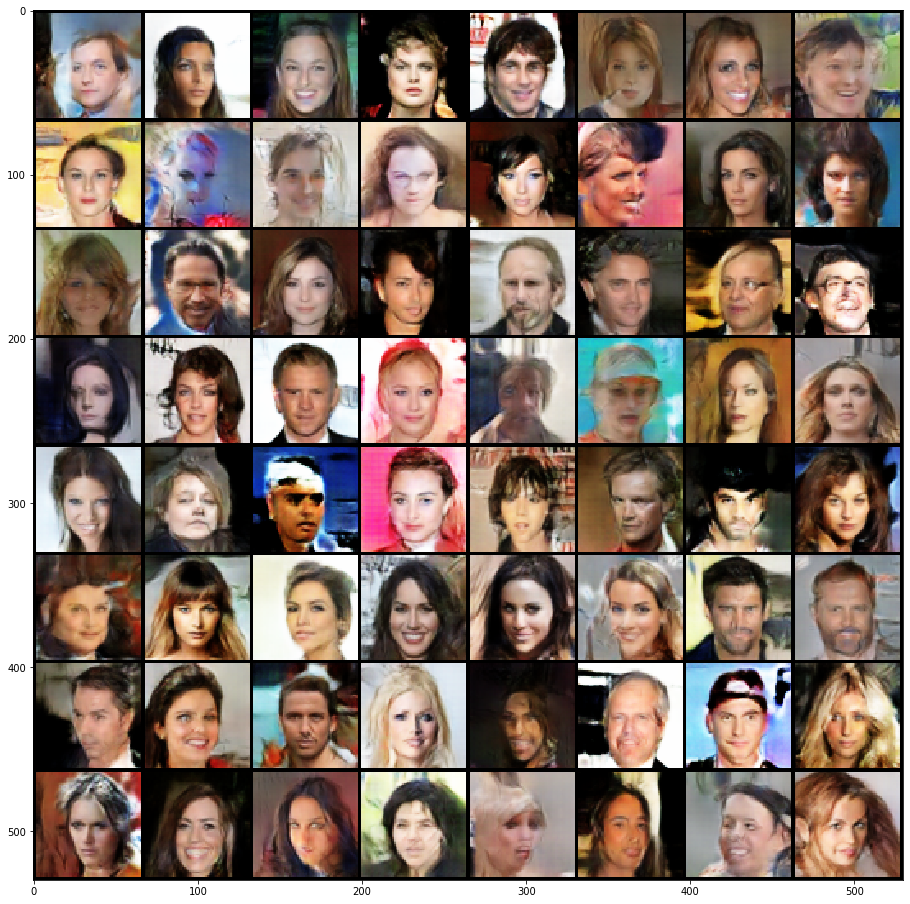

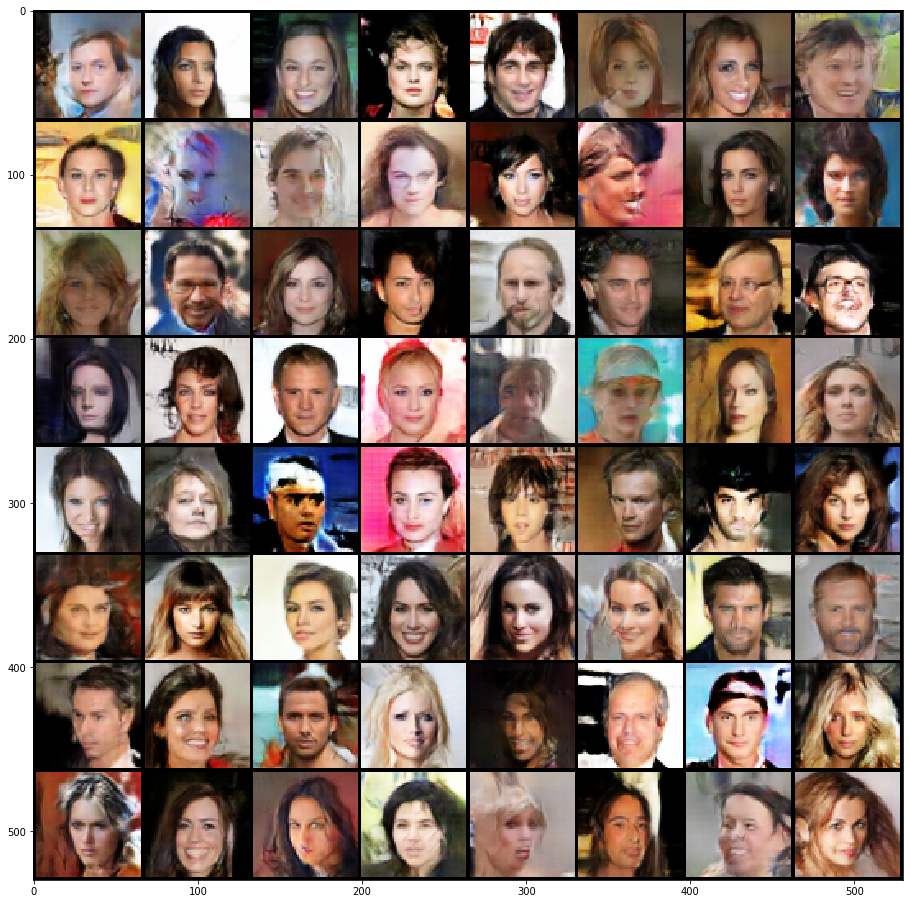

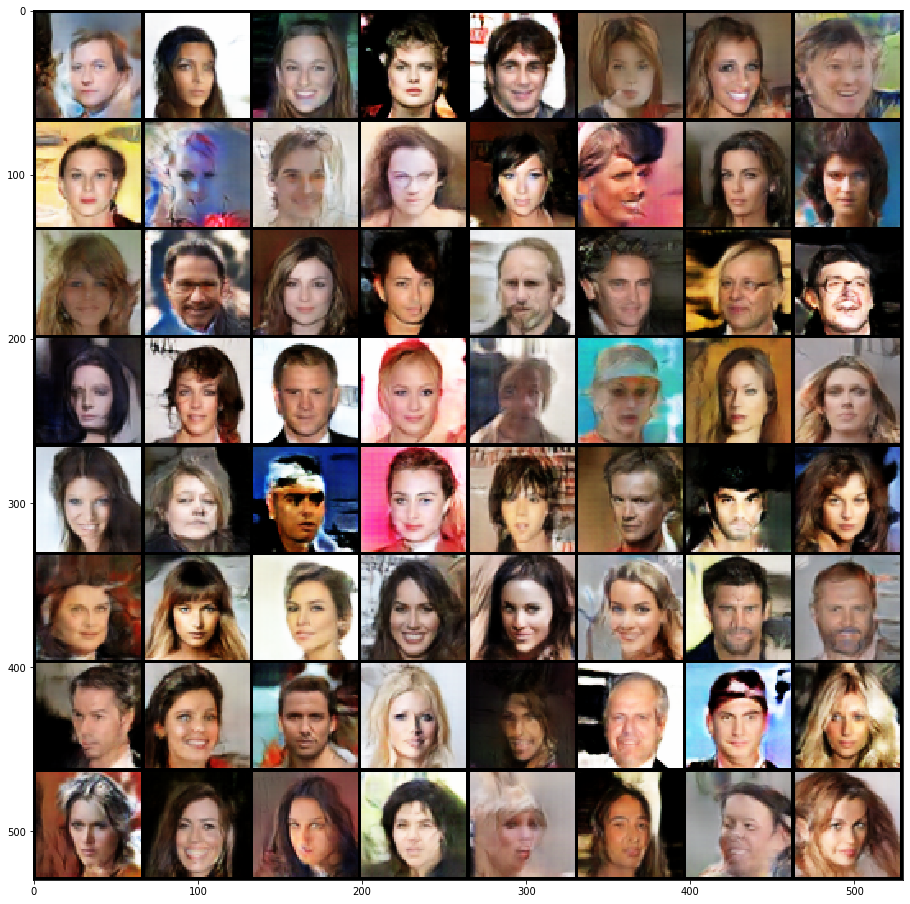

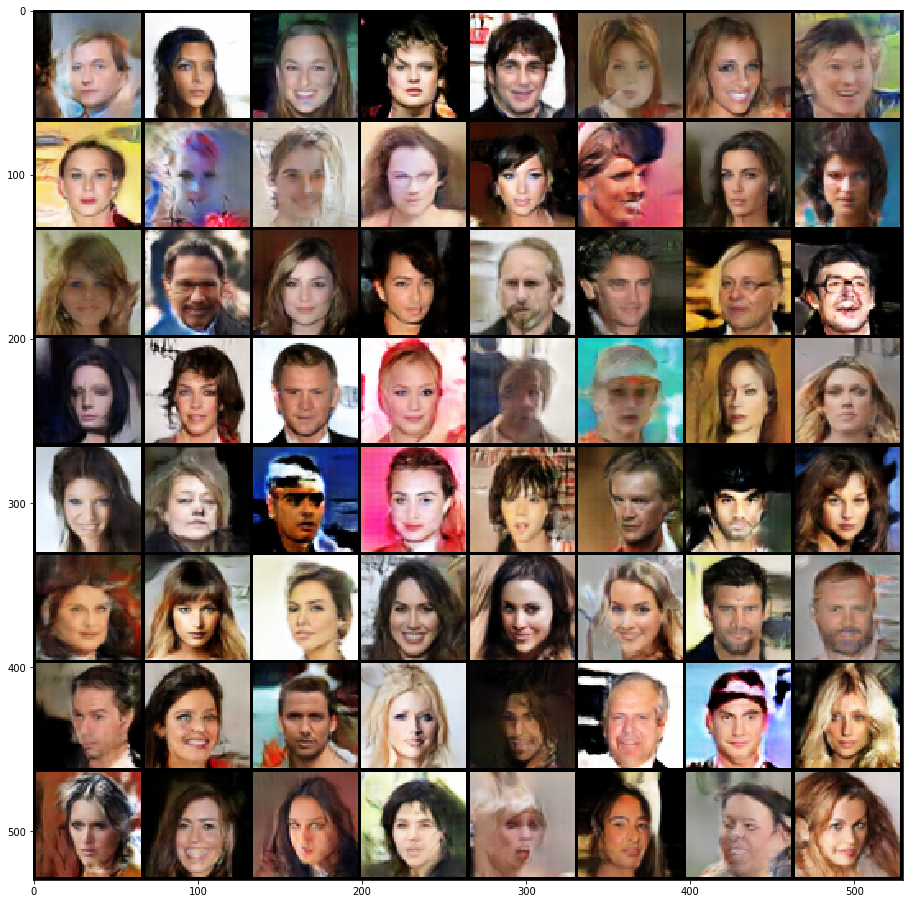

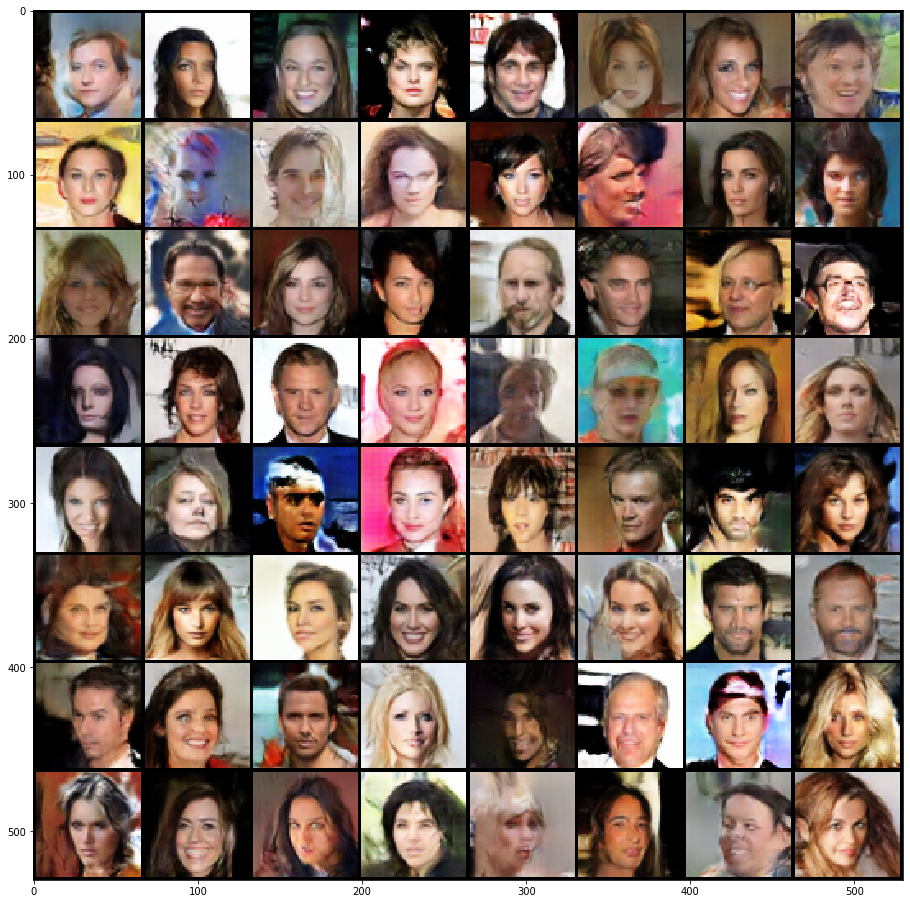

In [55]:
#date = '2020-04-22--23-39-14'
date = '2020-04-23--21-27-29'
file_path ='logs/'+date+ '_log/WGAN_data'+ date+'trial.p'
#file_path ='logs/2020-04-22--10-05-40_log/WGAN_data2020-04-22--10-05-40trial.p'

os.listdir('logs')

with open(file_path, 'rb') as f:
    training_dict = pickle.load(f)

training_dict.keys()

images = training_dict['img_list']

for image in images[-5:]:
    plt.figure(figsize=(16,16))
    plt.imshow(np.transpose(image, (1,2,0)))
    plt.show()

In [56]:
from dc_wgan_gpu import Generator

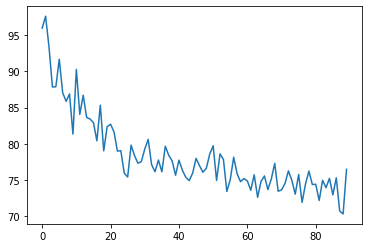

In [57]:
plt.plot(training_dict['FID_scores'][10:])

In [58]:
ngpu = 2
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
netG = Generator(ngpu).to(device)

G_state_dict = {}
for k,v in torch.load('logs/'+ date + '_log/early_stopG.pth.tar').items():
    mod = k.find('.')
    G_state_dict[k[mod+1:]] = v
    
netG.load_state_dict(G_state_dict)

<All keys matched successfully>

In [87]:
netG.eval()
num_imgs = 4
seed = torch.randn(num_imgs, 100,1,1).to(device)

In [59]:
with torch.no_grad():
    imgs = netG(seed)

In [88]:
def tensor_to_image(tensor_imgs, num_imgs):
    grid = vutils.make_grid(tensor_imgs, nrow=np.sqrt(num_imgs), padding=2, normalize=True)
    imgs = grid.detach().cpu().numpy().transpose((1,2,0))
    plt.imshow(imgs)
    plt.show()

# Latent Walks

In [89]:
start = torch.randn(num_imgs,100,1,1)
end = torch.randn(num_imgs,100,1,1)

In [139]:
def latent_plot(latent_tensor, num_imgs):
    grid = vutils.make_grid(latent_tensor, nrow=latent_tensor.shape[0]//num_imgs, padding=2, normalize=True)
    plt.figure(figsize=(20,10))
    plt.imshow(grid.detach().cpu().numpy().transpose(1,2,0))
    plt.show()

## Point A to B

## Linear

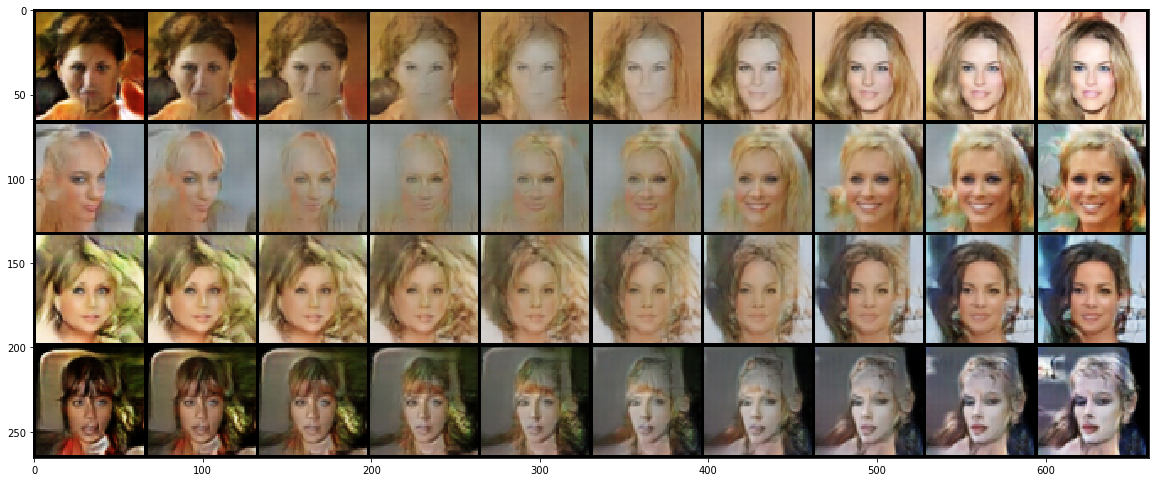

In [141]:
p = np.linspace(0,1,10).reshape(-1,1,1,1,1).astype('float32')
latent = start.unsqueeze(0)*p +end.unsqueeze(0)*(1-p)
latent = latent.permute(1,0,2,3,4).reshape((-1,) + latent.shape[2:])
with torch.no_grad():
    latent_walk_linear = netG(latent.to(device))
latent_plot(latent_walk_linear, num_imgs)

## Sinosuidal

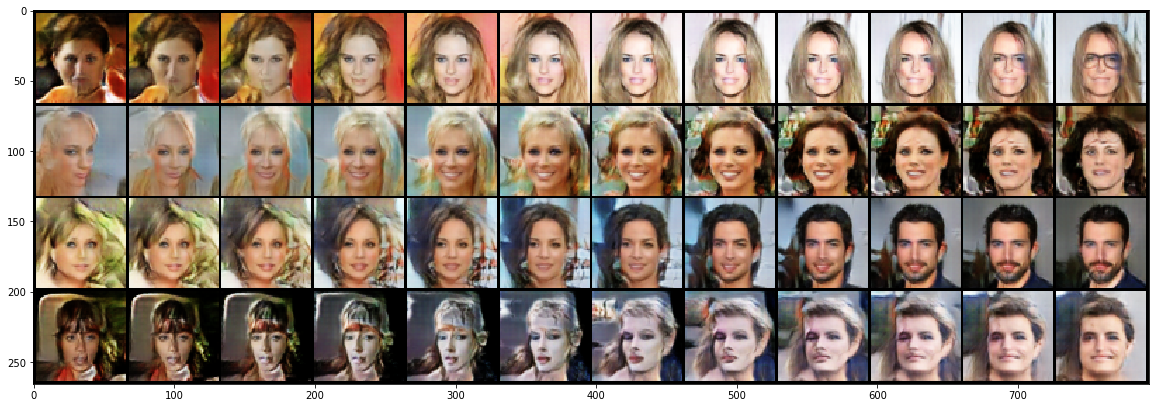

In [144]:
p = np.linspace(0,np.pi,12).reshape(-1,1,1,1,1).astype('float32')
latent = start.unsqueeze(0)*np.sin(p) +end.unsqueeze(0)*np.cos(p)
latent = latent.permute(1,0,2,3,4).reshape((-1,) + latent.shape[2:])
with torch.no_grad():
    latent_walk_sin = netG(latent.to(device))
latent_plot(latent_walk_sin, num_imgs)

## Scaling

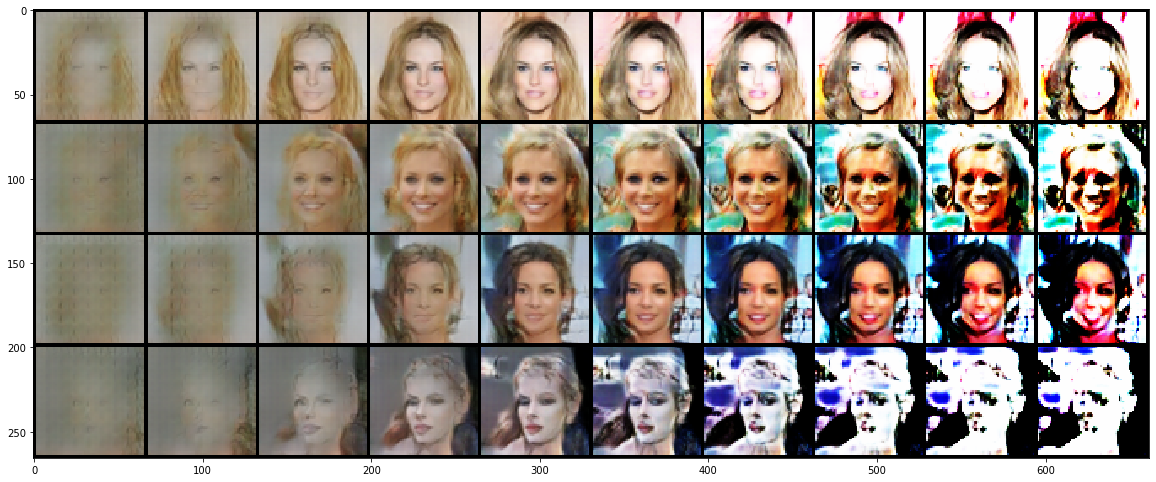

In [145]:
p = np.exp(np.linspace(-1,1,10)).reshape(-1,1,1,1,1).astype('float32')
latent = start.unsqueeze(0)*p
latent = latent.permute(1,0,2,3,4).reshape((-1,) + latent.shape[2:])
with torch.no_grad():
    latent_walk_scale = netG(latent.to(device))
latent_plot(latent_walk_scale, num_imgs)

## Coordinate projections

In [148]:
def projections(nz,proj_set):
    diag = np.ones(nz)
    diag[proj_set] = 0
    diag = np.random.shuffle(diag)
    diag.astype('float32')
    return np.diag(diag)

In [ ]:
proj_set = 
latent = start.unsqueeze(0)*p
latent = latent.permute(1,0,2,3,4).reshape((-1,) + latent.shape[2:])
with torch.no_grad():
    latent_walk_scale = netG(latent.to(device))
latent_plot(latent_walk_scale, num_imgs)